# **Polynomial Regression**

---

### **Definition:**
Polynomial Regression is an extension of Linear Regression that models the relationship between the dependent variable $y$ and the independent variable $x$ as an $n^{\text{th}}$ degree polynomial.  
The general formula is:

$$
y = c + m_1x^1 + m_2x^2 + m_3x^3 + \dots + m_nx^n
$$

- $c$: Intercept of the polynomial.  
- $m_1, m_2, \dots, m_n$: Coefficients of the polynomial terms.  
- $x$: Independent variable(s).  
- $n$: Degree of the polynomial.

---

### **Process:**

1. **Importing Libraries and Loading Data:**
   - Import necessary libraries such as `pandas`, `numpy`, and `matplotlib` for data manipulation and visualization.
   - Load the dataset into a DataFrame using `pd.read_csv()`.

2. **Preprocessing Data:**
   - Check for null or missing values in the dataset and handle them appropriately (e.g., using `fillna()`).
   - Separate the features and the target variable. For polynomial regression, the feature set is typically transformed into polynomial terms.

3. **Feature Transformation:**
   - Use `PolynomialFeatures` from `sklearn.preprocessing` to create polynomial features of the independent variable up to the desired degree.
   - For example, if the degree is 3, the transformed features for $x$ will be $[1, x, x^2, x^3]$.

4. **Splitting Data into Train and Test Sets:**
   - Use `train_test_split()` to split the data into training and testing subsets. This helps evaluate the model's performance on unseen data.

5. **Model Training:**
   - Initialize a `LinearRegression` model.
   - Fit the transformed polynomial features and the target variable to the model using `fit()`.

6. **Making Predictions:**
   - Use the trained model to predict the target variable for the test set.

7. **Model Evaluation:**
   - Evaluate the model's performance using metrics like:
     - **Mean Squared Error (MSE):**
       $$
       \text{MSE} = \frac{1}{n} \sum_{i=1}^n \left( Y_i - \hat{Y}_i \right)^2
       $$
     - **R-squared ($R^2$):**
       $$
       R^2 = 1 - \frac{\sum_{i=1}^n \left( Y_i - \hat{Y}_i \right)^2}{\sum_{i=1}^n \left( Y_i - \bar{Y} \right)^2}
       $$

8. **Visualizing the Results:**
   - Plot the original data points and the predicted polynomial regression line using `matplotlib` or `seaborn`.

---

### **Key Outputs:**
1. **Polynomial Equation:**  
   - The model generates an equation of the form:  
     $$ y = c + m_1x^1 + m_2x^2 + \dots + m_nx^n $$

2. **Performance Metrics:**  
   - Metrics like $R^2$ and MSE quantify the accuracy of the model.

3. **Visualization:**  
   - A plot showing the fit of the polynomial curve to the data points.

---

### **Purpose:**
Polynomial Regression is used when the relationship between the dependent and independent variables is non-linear. It can capture complex patterns in the data that cannot be modeled using simple linear regression.

---

### **Assumptions:**
1. The data follows a polynomial trend.  
2. The independent variable has a significant effect on the dependent variable.  
3. The model should not overfit the data, especially with high-degree polynomials.


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# **Process for Polynomial Regression**

---

### **Step 1: Importing Necessary Libraries**
The following libraries are used:
- `pandas`: For reading and manipulating data.
- `seaborn` and `matplotlib.pyplot`: For visualizing data relationships and trends.
- `PolynomialFeatures` from `sklearn.preprocessing`: For generating polynomial features.
- `LinearRegression` from `sklearn.linear_model`: For performing regression.
- `train_test_split` from `sklearn.model_selection`: For splitting the dataset into training and testing sets.

---

### **Step 2: Load and Explore the Dataset**
1. The dataset `level_salary.csv` is read into a pandas DataFrame.
2. The first 5 rows are displayed to inspect the data structure.
3. A scatter plot of `Level` vs. `Salary` visualizes the data distribution, and a line plot examines the overall trend.
4. The correlation between `Level` and `Salary` is computed to assess the linear relationship.

---

### **Step 3: Define Features and Target Variable**
1. The independent variable (`x`) is extracted as `Level`.
2. The dependent variable (`y`) is extracted as `Salary`.

---

### **Step 4: Transform Features into Polynomial Terms**
1. A polynomial transformer of degree 2 is initialized.
2. The feature `x` is transformed into polynomial terms, including $x^2$.

---

### **Step 5: Split Data into Training and Testing Sets**
1. The polynomial-transformed features (`x_fitted`) and the target variable (`y`) are split into training and testing sets with an 80:20 ratio.

---

### **Step 6: Train the Polynomial Regression Model**
1. A `LinearRegression` model is initialized and trained using the training set.

---

### **Step 7: Evaluate the Model**
1. The $R^2$ score for the test data evaluates the model’s performance:
   - **Model Accuracy:** 99.34%.
2. The coefficients ($m$) and intercept ($c$) of the regression equation are extracted.

---

### **Step 8: Visualize the Polynomial Fit**
1. Predictions for the entire dataset are generated.
2. A scatter plot of the original data is overlaid with the predicted polynomial regression curve.

---

### **Step 9: Test Prediction and Error Calculation**
1. The actual salary for a specific level (`Level = 35`) is retrieved.
2. The polynomial-transformed feature for `Level = 35` is prepared.
3. The model predicts the salary for `Level = 35`.
4. The relative error is calculated as the percentage difference between the predicted and actual salary:
   - **Error:** 0.65%.

---

### **Key Outputs:**
1. **Model Equation:** The polynomial equation takes the form:
   $$
   y = m_1x + m_2x^2 + c
   $$
   For this dataset:
   $$
   y = (-6084146.23 \cdot x) + (262034.61 \cdot x^2) + 26518388.93
   $$
2. **Model Performance:**
   - **Accuracy:** 99.34%.
   - **Error:** 0.65%.
3. **Visualization:** A graph showing the original data and the predicted polynomial fit.

---


In [71]:
salary_data = pd.read_csv('level_salary.csv')
salary_data.head(5)

,Level,Salary
0,1,14902.09790
1,2,78759.90676
2,3,94960.37296
3,4,88223.77622
4,5,83270.39627


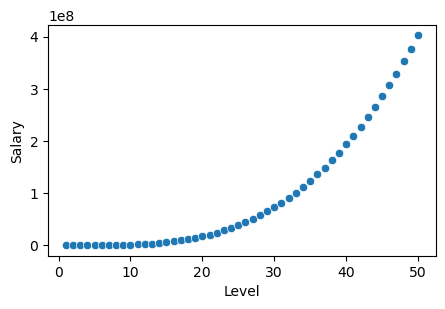

In [72]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Level', y='Salary', data=salary_data)
plt.show()

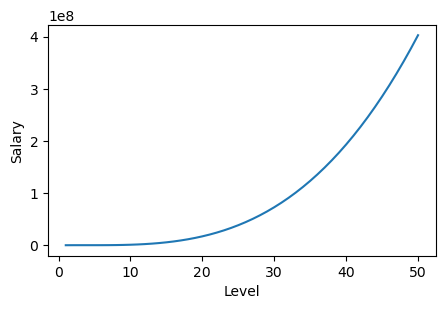

In [73]:
plt.figure(figsize=(5,3))
sns.lineplot(x='Level', y='Salary', data=salary_data)
plt.show()

In [74]:
salary_data.corr()

,Level,Salary
Level,1.000000,0.901155
Salary,0.901155,1.000000


In [75]:
x = salary_data[['Level']]
y = salary_data['Salary']

In [76]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
x_fitted = pf.transform(x)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_fitted, y, test_size=0.2, random_state=42)

In [78]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [79]:
lr.score(x_test, y_test)

0.9938795120796697

In [80]:
m = lr.coef_
c = lr.intercept_

m, c

(array([       0.        , -6084146.23107318,   262034.60939407]),
 26518388.93307823)

In [81]:
# y = m1x1 + m2(x2)^2 + c
# y = (-6084146.23107318 * x1) + (262034.60939407 * x2 )^2 + 26518388.93307823

In [82]:
y_prd = lr.predict(x_fitted)

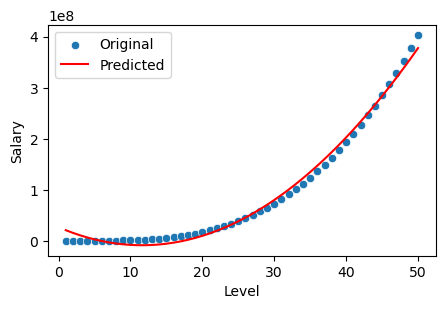

In [83]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Level', y='Salary', data=salary_data)
plt.plot(salary_data['Level'], y_prd, c='red')
plt.legend(['Original', 'Predicted'])
plt.show()

#### TEST

In [84]:
salary_data.head()

,Level,Salary
0,1,14902.09790
1,2,78759.90676
2,3,94960.37296
3,4,88223.77622
4,5,83270.39627


In [85]:
salary_data['Salary'][4]

83270.39627

In [86]:
level_35_value = salary_data['Salary'][34]

level_35_value

123376452.2

In [87]:
test = pf.transform([[34]])

test

c:\Users\Durjay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000e+00, 3.400e+01, 1.156e+03]])

In [88]:
prd_level_35_value = lr.predict(test)

prd_level_35_value

array([1.22569426e+08])

In [89]:
import numpy as np
error = (abs(level_35_value - prd_level_35_value) / level_35_value ) 

error * 100

array([0.65411726])

Only 0.65% error